In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def otsu_fitness_intra(im, th):
    th = int(th)
    foreground = im >= th
    background = im < th

    w0 = np.sum(background) / im.size
    w1 = 1 - w0

    if w0 == 0 or w1 == 0:
        return np.inf 

    var0 = np.var(im[background]) if w0 > 0 else 0
    var1 = np.var(im[foreground]) if w1 > 0 else 0

    return w0 * var0 + w1 * var1  

def threshold_image(im, th):
    result = np.zeros_like(im)
    result[im <= th] = 255 
    return result

def initialize_population(size, low=1, high=255):
    return np.random.randint(low, high, size=size)

def select_parents(pop, fitnesses, num_selected):
    idx = np.argsort(fitnesses)[:num_selected]
    return pop[idx]

def crossover(parents, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        p1, p2 = np.random.choice(parents, 2, replace=False)
        child = (p1 + p2) // 2
        offspring.append(child)
    return np.array(offspring)

def mutate(pop, mutation_rate=0.15, low=1, high=255):
    for i in range(len(pop)):
        if np.random.rand() < mutation_rate:
            pop[i] = np.random.randint(low, high)
    return pop

def genetic_otsu_intra(im, pop_size=40, generations=50):
    population = initialize_population(pop_size)

    for gen in range(generations):
        fitnesses = np.array([otsu_fitness_intra(im, th) for th in population])
        parents = select_parents(population, fitnesses, pop_size // 2)
        offspring = crossover(parents, pop_size - len(parents))
        offspring = mutate(offspring)
        population = np.concatenate([parents, offspring])

    final_fitnesses = np.array([otsu_fitness_intra(im, th) for th in population])
    best_threshold = population[np.argmin(final_fitnesses)]
    return best_threshold



Threshold terbaik (GA + Intra-class): 124


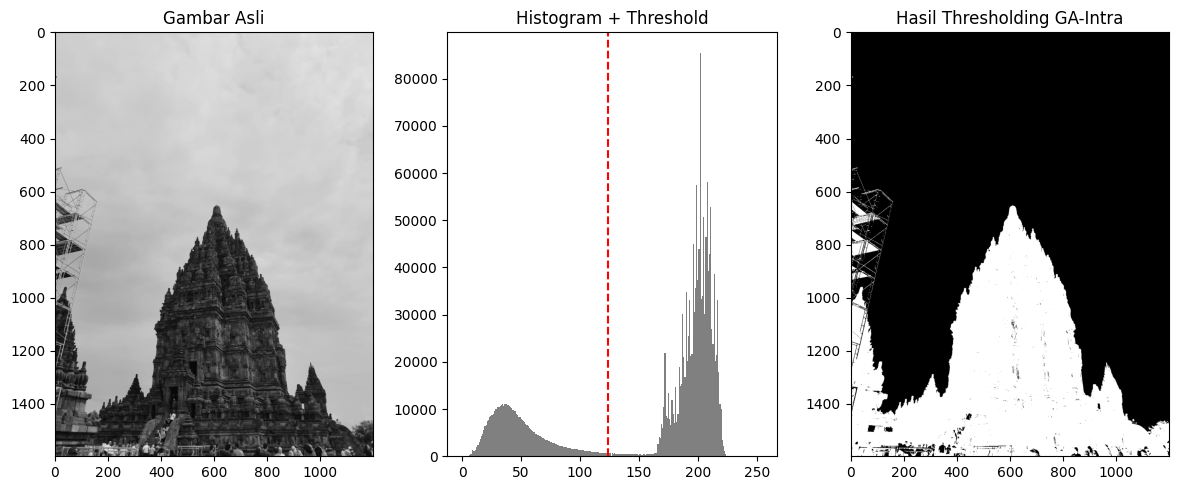

In [3]:
def main():
    path = r"C:\Users\ASUS TUF A15\OneDrive\Documents\Onedrive - Sulthan Abdillah's UNAIR Drive\Cool-yeah\SMT 6\Sistem Kontrol Lanjut\UAS\candi.jpg" 
    im = np.array(Image.open(path).convert('L'))

    best_th = genetic_otsu_intra(im)
    print(f"Threshold terbaik (GA + Intra-class): {best_th}")

    binary = threshold_image(im, best_th)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(im, cmap='gray')
    plt.title('Gambar Asli')

    plt.subplot(1, 3, 2)
    plt.hist(im.ravel(), bins=256, color='gray')
    plt.axvline(best_th, color='r', linestyle='--')
    plt.title('Histogram + Threshold')

    plt.subplot(1, 3, 3)
    plt.imshow(binary, cmap='gray')
    plt.title('Hasil Thresholding GA-Intra')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
